***Building and Training neural networks with Tensorflow***

We are going to train a network to classify the mnist dataset. The mnist dataset is a collection of handwritten digits. 


*** Importing and shaping the input data ***

Write a script that will import the mnist dataset. 
This can be done by using:

    tensorflow.keras.datasets.mnist.load_data()  

Make sure that you correctly separate the images and the labels in a training and testing set.

Before we start feeding our data into the model we will need to reshape our input into a format that the model can read. 
The original shape of the input (train images) is [60000 , 28 , 28] (i.e. 60000 images of 28px*28px). For this you can use:
    
    reshape()
    astype()
    
Additionally we will need to encode the label data.
We will use categorical encoding, which in essence turns a number of features in numerical representations.

    to_categorical()

In [1]:
# Here we will import all the necesssary packages for this assignment

from __future__ import absolute_import, division, print_function, unicode_literals

#other helpful libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing tensorflow and keras
import tensorflow as tf
#from tensorflow import keras

print(tf.__version__)

from tensorflow.keras.datasets import mnist             # we are importing the mnist dataset
from tensorflow.keras import models                     # this is a module which will help us build the NN
from tensorflow.keras import layers                     # this is a module which will help us build the NN
from tensorflow.keras.utils import to_categorical       # this is used for data encoding (more on it later)
from tensorflow.keras.callbacks import EarlyStopping    # this is a module used in early stopping


2.1.0


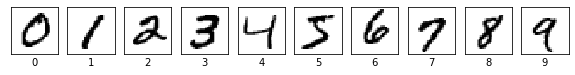

In [2]:
#Now import the MNIST dataset, and split it into 2 distinct sets of images and labels: one for training and one for testing.

(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

# Before we start feeding our data into the model we will need to reshape our input into a format that the model can read. 
# The original shape of the input (train images) is [60000 , 28 , 28] 60000img of 28px*28px

train_images = train_images0.reshape( ( 60000, 28*28 ))
train_images = train_images.astype('float32')/255
test_images  = test_images0.reshape( ( 10000, 28*28 ))
test_images  = test_images.astype('float32')/255

# additionally we will need to encode the label data.
# We will use categorical encoding, which in essence turns a number of features in numerical representations



# print one image per class
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind=np.where(train_labels0==class_names[i])[0][0]
    plt.imshow(train_images0[ind], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels0[ind]])
plt.show()

In [3]:
print(train_images.shape)
print(test_labels)

(60000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


***Problem 2.*** Build and train a dense neural network using tensorflow. For this problem consider a network with 2,5,10 layers and vary the numbers of nodes per layer. Use early stopping to avoid overfitting.

Question 1: What do you notice? (plots & and a written conclusion)

Question 2: Plot one example misclassified image for each class from the test set. For each misclassified image, plot a histogram showing the predicted outputs (a vector whose size is the number of classes and whose entries is the network output for that image - hint: use model.predict), and the true label. Can you speculate on why the digits where misclassified? Did the different architectures yield the same mistakes in classification?

*p.s. Use a large number (>75) of epochs for training.*

Hint: you may use code from https://www.tensorflow.org/tutorials/keras/classification

In [5]:
def classifier(layerHidden,number_of_epochs=100):
    
    L=len(layerHidden) # number of hidden layers
    #Now that we have sorted the dataset, we can proceed in building our model.

    # 2 layer model

       # this initializes a sequential model that we will call network
       # this adds a dense layer (dense means connected to all other nodes in the previous layer) of size 784(=28*28)
    
       #   the activation parameter refers to the activation function and the 28*28 describes the input shape of the image (_pixels*_pixels) 
    
       # this is the output layer that will give us the result of the digit

    # network.compile(optimizer = 'adam',
    #                 metrics = ['accuracy'])                                        # once our model has been defined, we compile it with the optimizer, loss function and the matrics used to judge the performance

    
    print(network.summary())

    # Now we have our data split into training and test sets, our model is compiled and all our data is reshaped and encoded.
    # We are ready to train our Neural Network

    # To train the NN we will use the fit function and pass in our required parameters
    # Trains the model for a fixed number of epochs (iterations on a dataset).

 
 
    return network

# Here we pass in our training images and their labels as well as epochs, which dictate the number of backward and forward propagations,
# and the batch_size, which indicates the number of training samples per backwards/forward propagation

number_of_epochs = 100

# layerSet=[[],[200],[200,100,50],[200,100,100,50,50,50,50,50]]
layerSet=[[],[200]]
accuracy=[]; loss=[];
network2=classifier(layerSet[0],number_of_epochs)
test_loss, test_acc = network1.evaluate(test_images, test_labels)
accuracy.append(test_acc); loss.append(test_loss)
network5=classifier(layerSet[1],number_of_epochs)
test_loss, test_acc = network2.evaluate(test_images, test_labels)
accuracy.append(test_acc); loss.append(test_loss)
# network10=classifier(layerSet[2],number_of_epochs)
# test_loss, test_acc = network10.evaluate(test_images, test_labels)
# accuracy.append(test_acc); loss.append(test_loss)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None
10000/10000 [==============================] - 1s 54us/sample - loss: 0.1208 - accuracy: 0.9804
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 200)               157000    
_________________________________________________________

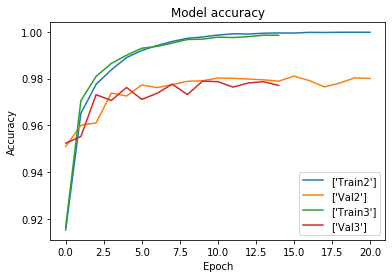

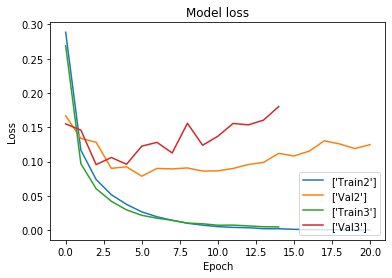

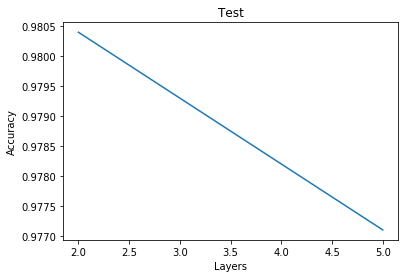

In [6]:
# Plot training & validation accuracy values
legendlab=[]
plt.plot(network1.history.history['accuracy'])
plt.plot(network1.history.history['val_accuracy'])
legendlab.append(['Train1']); legendlab.append(['Val1']);
plt.plot(network2.history.history['accuracy'])
plt.plot(network2.history.history['val_accuracy'])
legendlab.append(['Train2']); legendlab.append(['Val2']);
# plt.plot(network10.history.history['accuracy'])
# plt.plot(network10.history.history['val_accuracy'])
# legendlab.append(['Train5']); legendlab.append(['Val5']);
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(legendlab, loc='lower right')
plt.show()

# Plot training & validation accuracy values
legendlab=[]
plt.plot(network1.history.history['loss'])
plt.plot(network1.history.history['val_loss'])
legendlab.append(['Train1']); legendlab.append(['Val1']);
plt.plot(network2.history.history['loss'])
plt.plot(network2.history.history['val_loss'])
legendlab.append(['Train2']); legendlab.append(['Val2']);
# plt.plot(network10.history.history['loss'])
# plt.plot(network10.history.history['val_loss'])
# legendlab.append(['Train5']); legendlab.append(['Val5']);
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(legendlab, loc='lower right')
plt.show()

# plt.plot([2,5,10],accuracy)
plt.plot([1,2],accuracy)
plt.title('Test')
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layers')
plt.show()


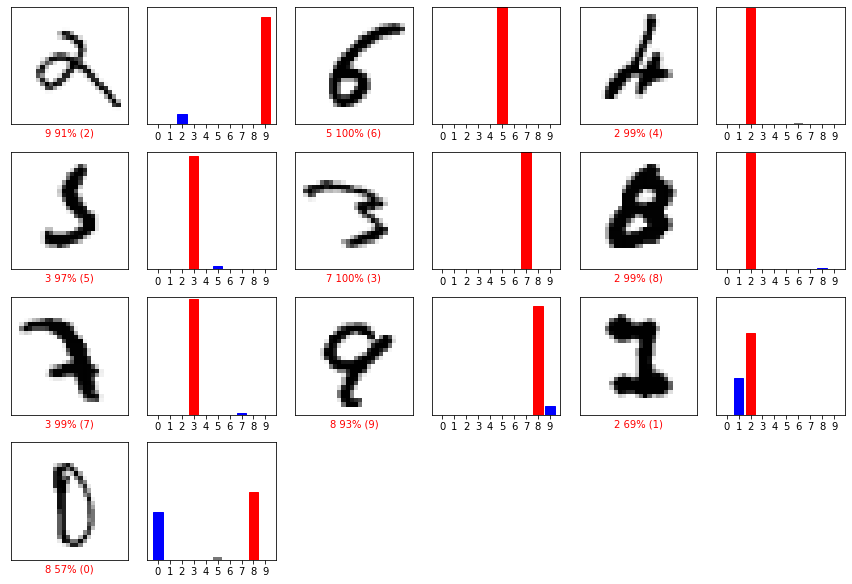

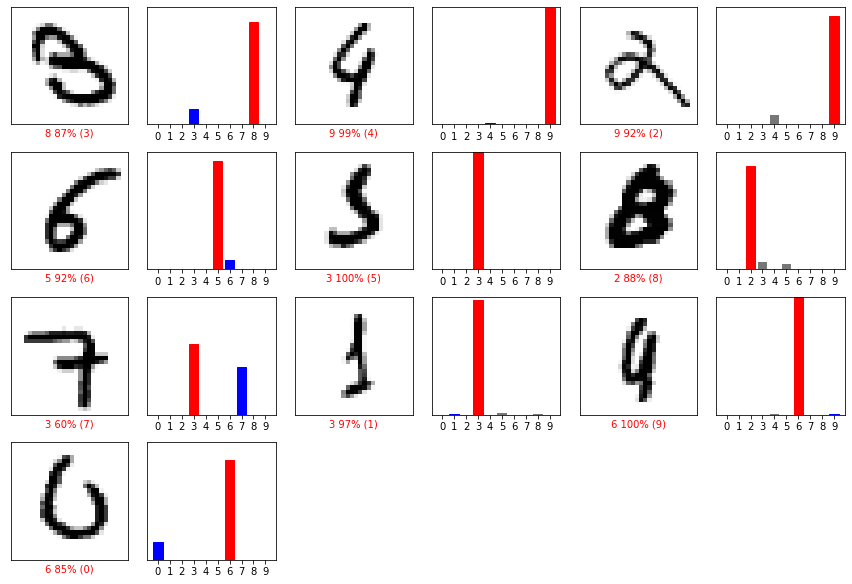

In [9]:
def plot_mistakes(network,test_images,test_labels0):

    def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      img=img.reshape(28,28)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

    def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(10))
      plt.yticks([])
      thisplot = plt.bar(range(10), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')

    predictions = network.predict(test_images)

    predictions_labels=np.argmax(predictions,axis=1)
    indwrong=np.where(~(predictions_labels==test_labels0))
    test_labels_wrong=test_labels0[indwrong[0]]
    test_images_wrong=test_images[indwrong[0]]
    predictions_wrong=predictions[indwrong[0]]
    plot_labels=np.zeros((1,len(np.unique(test_labels_wrong))))
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    cnt=0
    for i in range(len(test_labels_wrong)):
        # plot one image per class
        if plot_labels[0][test_labels_wrong[i]]==0:
            plot_labels[0][test_labels_wrong[i]]=1
            plt.subplot(num_rows, 2*num_cols, 2*cnt+1)
            plot_image(i, predictions_wrong[i], test_labels_wrong, test_images_wrong)
            plt.subplot(num_rows, 2*num_cols, 2*cnt+2)
            plot_value_array(i, predictions_wrong[i], test_labels_wrong)
            cnt+=1
    plt.tight_layout()
    plt.show()

plot_mistakes(network1,test_images,test_labels0)
plot_mistakes(network2,test_images,test_labels0)